In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.linalg as la

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


1.

(2, 1837)
(1837,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


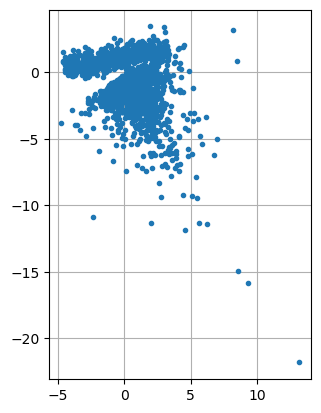

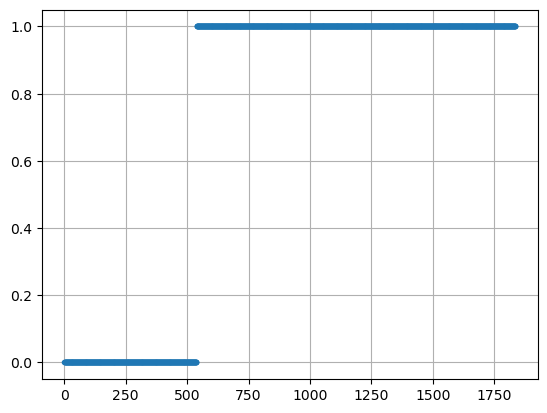

In [38]:
fN = '/Users/anaso/Documents/AA/AA-22-23/FichasCasa/Ficha4/A39275_Q001_data.p'

D = pickle.load(open(fN, 'rb'))

X = D['X']
y = D['y']

# Modelo linear - y_e = w0 + w1*x1 + w2*x2 para y_e > 0

print(X.shape)
print(y.shape)

plt.figure()
plt.plot(X[0, :], X[1, :], '.')
plt.grid(True)
plt.axis('scaled')


# Dados ordenados
idx = np.argsort(y)
X1 = X[:, idx]
y1 = y[idx]

print(y1[-100:])

plt.figure()
plt.plot(y1, '.')
plt.grid(True)
 

a) - [0, 1, 0, 0]

Número de erros:  155
Matriz de confusão: 
 [[ 418  120]
 [  35 1264]]

Verdadeiros Positivos:  1264
Falsos Positivos:  120
Total Positivos:  1299

Verdadeiros Negativos:  418
Falsos Negativos:  35
Total Negativos:  538

Número total de acertos:  1682
Recall:  0.973
Precisão:  0.913
Falsos Positivos (falsos alarmes):  0.223


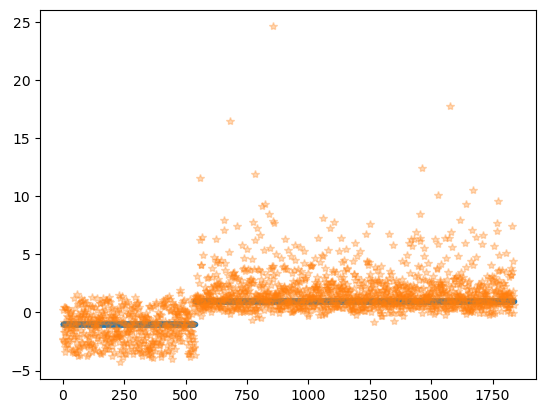

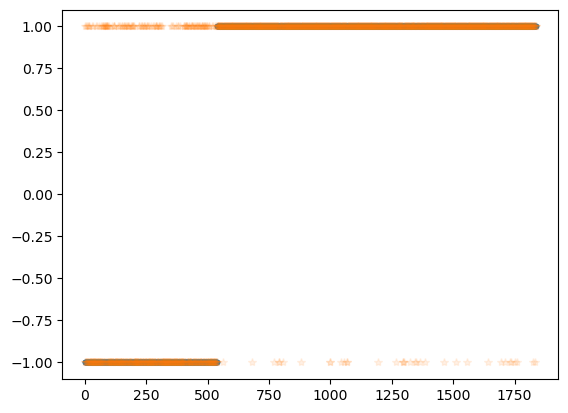

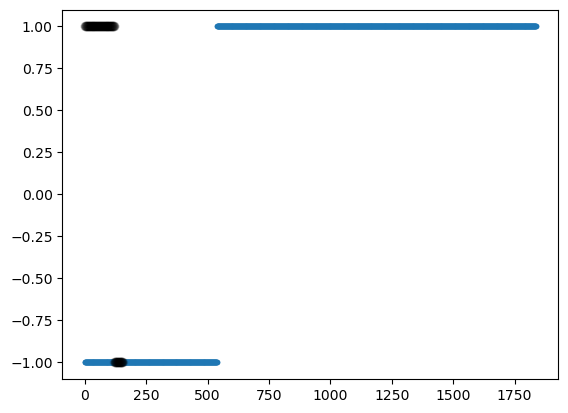

In [39]:
x_homo = np.vstack((np.ones(X1.shape[1]), X1))
y10 = np.hstack((-np.ones(np.sum(y1==0)), np.ones(np.sum(y1==1))))

w = [0.00, 0.71, -0.70]

ye = np.dot(w, x_homo)
ye = x_homo[0, :]*w[0] + x_homo[1, :]*w[1] + x_homo[2, :]*w[2]

plt.figure()
plt.plot(y10, '.')
plt.plot(ye, '*', alpha=0.3)

ye = (ye >= 0)*2.-1

plt.figure()
plt.plot(y10, '.')
plt.plot(ye, '*', alpha=0.1)

plt.figure()
plt.plot(y10, '.')
plt.plot(ye[ye != y10], 'ok', alpha=0.1)

erros = y10 != ye
print("Número de erros: ", np.sum(erros))

CM = confusion_matrix(y10, ye)
print("Matriz de confusão: \n", CM)

TP = CM[1][1]
FP = CM[0][1]
TN = CM[0][0]
FN = CM[1][0]

print("")
print("Verdadeiros Positivos: ", TP)
print("Falsos Positivos: ", FP)
print("Total Positivos: ", TP + FN)
print("")
print("Verdadeiros Negativos: ", TN)
print("Falsos Negativos: ", FN)
print("Total Negativos: ", TN + FP)
print("")

alarme = FP/(FP+TN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
print("Número total de acertos: ", TP+TN)
print("Recall: ", np.round(recall, 3))
print("Precisão: ", np.round(precision, 3))
print("Falsos Positivos (falsos alarmes): ", np.round(alarme, 3))


b) - [0, 1, 0, 0]

Número de erros:  173
Matriz de confusão: 
 [[ 415  123]
 [  50 1249]]

Verdadeiros Positivos:  1249
Falsos Positivos:  123
Total Positivos:  1299

Verdadeiros Negativos:  415
Falsos Negativos:  50
Total Negativos:  538

Número erros w1:  123
Precisão:  0.91


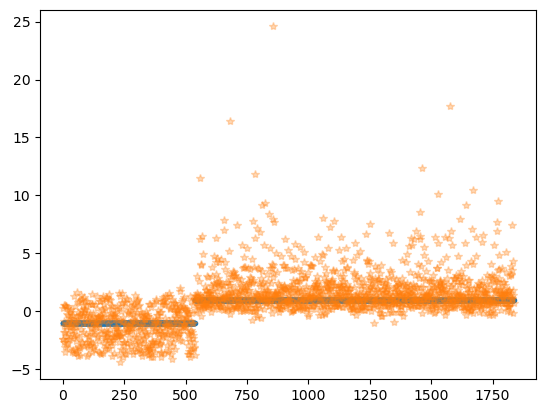

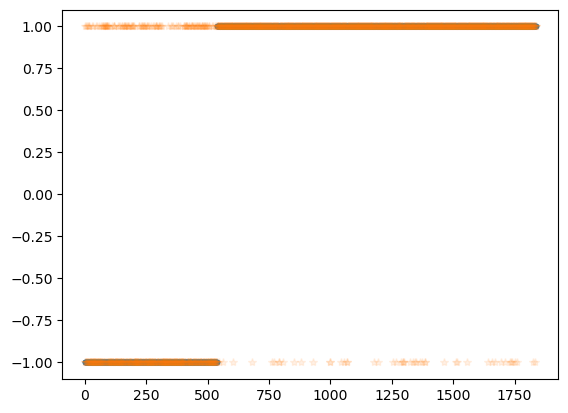

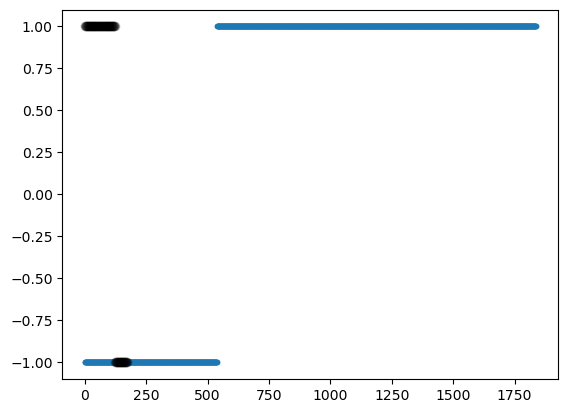

In [40]:
x_homo = np.vstack((np.ones(X1.shape[1]), X1))
y10 = np.hstack((-np.ones(np.sum(y1==0)), np.ones(np.sum(y1==1))))

w = [0.00, 0.74, -0.68]

ye = np.dot(w, x_homo)
ye = x_homo[0, :]*w[0] + x_homo[1, :]*w[1] + x_homo[2, :]*w[2]

plt.figure()
plt.plot(y10, '.')
plt.plot(ye, '*', alpha=0.3)

ye = (ye >= 0)*2.-1

plt.figure()
plt.plot(y10, '.')
plt.plot(ye, '*', alpha=0.1)

plt.figure()
plt.plot(y10, '.')
plt.plot(ye[ye != y10], 'ok', alpha=0.1)

erros = y10 != ye
print("Número de erros: ", np.sum(erros))

CM = confusion_matrix(y10, ye)
print("Matriz de confusão: \n", CM)

TP = CM[1][1]
FP = CM[0][1]
TN = CM[0][0]
FN = CM[1][0]

print("")
print("Verdadeiros Positivos: ", TP)
print("Falsos Positivos: ", FP)
print("Total Positivos: ", TP + FN)
print("")
print("Verdadeiros Negativos: ", TN)
print("Falsos Negativos: ", FN)
print("Total Negativos: ", TN + FP)
print("")

alarme = FP/(FP+TN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
print("Número erros w1: ", FP)
print("Precisão: ", np.round(precision, 3))

c) - [1, 0, 0, 0]

In [41]:
x_homo = np.vstack((np.ones(X1.shape[1]), X1))
y10 = np.hstack((-np.ones(np.sum(y1==0)), np.ones(np.sum(y1==1))))

Rx = np.dot(x_homo, x_homo.T)
rxy = np.dot(x_homo, y10)

w = np.dot(la.pinv(Rx), rxy)

ye = np.dot(w.T, x_homo)
ye = (ye>=0)*2-1

mse = mean_squared_error(y10, ye)

print("Wopt: ", w)
print("Mean Squared Error: ", np.round(mse, 3))


Wopt:  [ 0.14149822  0.09635784 -0.25078611]
Mean Squared Error:  0.148


2.

In [42]:
fN = "/Users/anaso/Documents/AA/AA-22-23/FichasCasa/Ficha4/A39275_Q002_data.p"

D = pickle.load(open(fN, 'rb'))

X = D['x']
Y = D['y']
folds = D['folds']

print(D)


{'x': array([-3.88220044e+00, -4.47023704e+00, -4.91158005e+00, -7.80278934e-01,
       -1.33275414e+00, -5.70372001e-01, -3.06999846e+00, -3.75198527e-02,
       -1.74410329e+00, -3.14086985e+00, -1.66727592e+00, -4.67491624e+00,
       -1.33483558e+00, -2.66192938e+00, -5.01796719e+00, -2.44332016e+00,
       -4.28681437e+00, -2.11270819e+00, -1.53920795e+00, -2.06942561e+00,
       -2.50896489e+00, -1.77777790e+00, -1.15831265e+00, -1.34590897e+00,
       -2.23268665e+00, -4.41769739e+00, -8.56316418e-01, -4.50969426e+00,
       -4.66261845e-01, -2.62671848e+00, -2.16313815e+00, -1.17918598e+00,
       -3.37838801e-01, -9.68863174e-01, -8.43317205e-01, -3.16754217e-01,
       -5.06050470e+00, -4.25564605e+00, -1.69750767e-01, -4.05424974e+00,
       -2.51034425e-01, -2.38229456e+00, -1.69183517e+00, -4.59978610e+00,
       -1.95570329e+00, -1.77007271e+00, -4.63214818e+00, -4.71839260e+00,
       -3.47884944e-01, -3.32427029e+00, -2.62431184e+00, -2.82954198e+00,
       -1.50790299e

a) - [1, 0, 0, 0]

Score Treino:  0.8324121440484373
Score Teste:  0.868718333492404
MSE - Treino:  0.1069194403236815
MSE - Teste:  0.09108061968176252
[-7.40571408 -6.67776981 -1.94863158 -0.1795889 ]


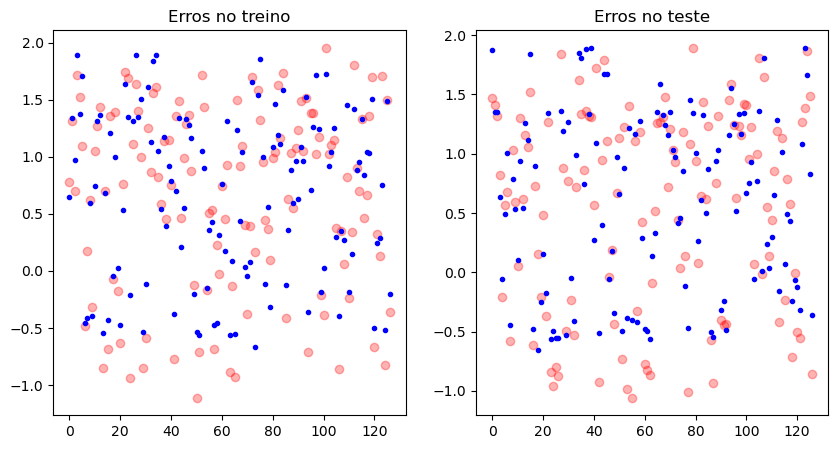

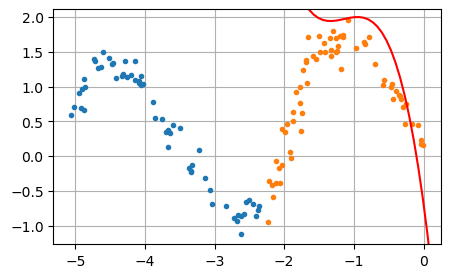

In [50]:
# Treino
xA_treino = X[:127][:, np.newaxis]
yA_treino = Y[:127]
foldA_treino = folds[:127]

# Teste
xA_teste = X[-127:][:, np.newaxis]
yA_teste = Y[-127:]
foldA_teste = folds[-127:]


# xA_treino_homo = np.vstack((np.ones(xA_treino.shape[0]), xA_treino, xA_treino**2, xA_treino**3, xA_treino**4))

# yA_treino[yA_treino==0] = -1

# print(xA_treino_homo.shape)

# Rx = np.dot(xA_treino_homo, xA_treino_homo.T)
# rxy = np.dot(yA_treino, xA_treino_homo.T)

# w = np.dot(la.pinv(Rx), rxy)

# yA_treino_e = np.dot(w.T, xA_treino_homo)
# yA_treino_e_b = (yA_treino_e>0)*2-1

# plt.figure()
# plt.plot(yA_treino, '.')
# plt.plot(yA_treino_e, 'ok', alpha=0.3)
# plt.plot(yA_treino_e_b, 'ok', alpha=0.3)

poly = PolynomialFeatures(4, include_bias=False).fit(xA_treino)
xA_treino_homo = poly.transform(xA_treino)
xA_teste_homo = poly.transform(xA_teste)

lr = LinearRegression().fit(xA_treino_homo, yA_treino)

print("Score Treino: ", lr.score(xA_treino_homo, yA_treino))
print("Score Teste: ", lr.score(xA_teste_homo, yA_teste))


yA_treino_predito = lr.predict(xA_treino_homo)
yA_teste_predito = lr.predict(xA_teste_homo)

print("MSE - Treino: ", mean_squared_error(yA_treino, yA_treino_predito))
print("MSE - Teste: ", mean_squared_error(yA_teste, yA_teste_predito))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Erros no treino")
#plt.plot(xA_treino, 'or', alpha=0.3)
plt.plot(yA_treino, 'or', alpha=0.3)
plt.plot(yA_treino_predito, '.b')
plt.subplot(122)
plt.title("Erros no teste")
#plt.plot(xA_teste, 'or', alpha=0.3)
plt.plot(yA_teste, 'or', alpha=0.3)
plt.plot(yA_teste_predito, '.b')


w0 = lr.intercept_
w = lr.coef_
print(lr.coef_)

xtmp = np.linspace(-7, 6, 200)
ytmp = w0 + w[0]*xtmp + w[1]*xtmp**2 + w[2]*xtmp**3

plt.figure(figsize=(5,5))
plt.plot(xA_treino[foldA_treino==0], yA_treino[foldA_treino==0], '.')
plt.plot(xA_treino[foldA_treino==1], yA_treino[foldA_treino==1], '.')
plt.axis('scaled')
plt.grid(True)
plt.plot(xtmp, ytmp, 'r')




Score Treino:  0.9722448897422875
Score Teste:  -69.2420854577285
MSE - Treino:  0.019461490733060586
MSE - Teste:  37.2754991020039
[17.58567869  4.80556287  0.27821109 -0.02414202]


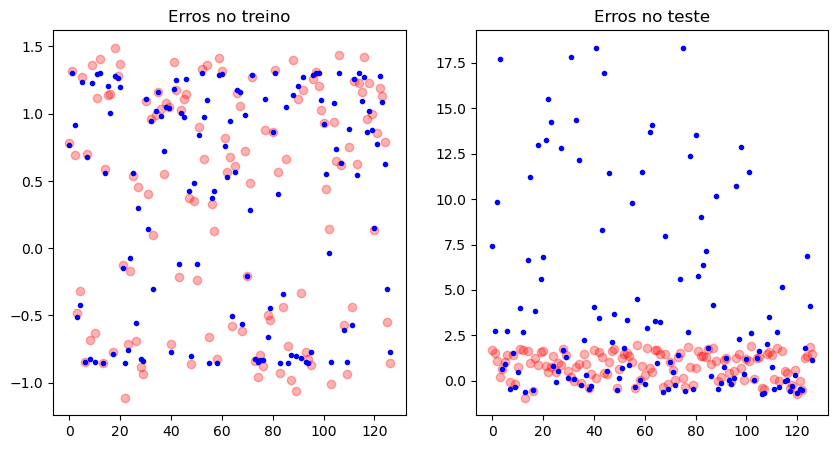

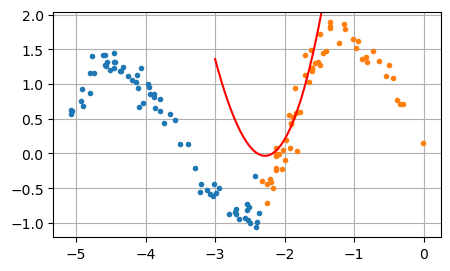

In [48]:
f0 = folds==0
f1 = folds==1


# Treino
xB_treino = X[f0][:, np.newaxis]
yB_treino = Y[f0]
foldB_treino = folds[f0]

# Teste
xB_teste = X[f1][:, np.newaxis]
yB_teste = Y[f1]
foldB_teste = folds[f1]



poly = PolynomialFeatures(4, include_bias=False).fit(xB_treino)
xB_treino_homo = poly.transform(xB_treino)
xB_teste_homo = poly.transform(xB_teste)

lr = LinearRegression().fit(xB_treino_homo, yB_treino)

print("Score Treino: ", lr.score(xB_treino_homo, yB_treino))
print("Score Teste: ", lr.score(xB_teste_homo, yB_teste))

yB_treino_predito = lr.predict(xB_treino_homo)
yB_teste_predito = lr.predict(xB_teste_homo)


print("MSE - Treino: ", mean_squared_error(yB_treino, yB_treino_predito))
print("MSE - Teste: ", mean_squared_error(yB_teste, yB_teste_predito))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Erros no treino")
#plt.plot(xB_treino, 'or', alpha=0.3)
plt.plot(yB_treino, 'or', alpha=0.3)
plt.plot(yB_treino_predito, '.b')
plt.subplot(122)
plt.title("Erros no teste")
#plt.plot(xB_teste, 'or', alpha=0.3)
plt.plot(yB_teste, 'or', alpha=0.3)
plt.plot(yB_teste_predito, '.b')


w0 = lr.intercept_
w = lr.coef_
print(lr.coef_)

xtmp = np.linspace(-3, 6, 200)
ytmp = w0 + w[0]*xtmp + w[1]*xtmp**2 + w[2]*xtmp**3

plt.figure(figsize=(5,5))
plt.plot(xA_teste[foldA_teste==0], yA_teste[foldA_teste==0], '.')
plt.plot(xA_teste[foldA_teste==1], yA_teste[foldA_teste==1], '.')
plt.axis('scaled')
plt.grid(True)
plt.plot(xtmp, ytmp, 'r')

b) - [0, 0, 0, 1]

In [ ]:
f0 = folds==0
f1 = folds==1

# Treino
xB_treino = X[f1][:, np.newaxis]
yB_treino = Y[f1]
foldB_treino = folds[f1]

# Teste
xB_teste = X[f0][:, np.newaxis]
yB_teste = Y[f0]
foldB_teste = folds[f0]


poly = PolynomialFeatures(4, include_bias=False).fit(xB_treino)
xB_treino_homo = poly.transform(xB_treino)
xB_teste_homo = poly.transform(xB_teste)

lr = LinearRegression().fit(xB_treino_homo, yB_treino)

print("Score Treino: ", lr.score(xB_treino_homo, yB_treino))
print("Score Teste: ", lr.score(xB_teste_homo, yB_teste))

yB_treino_predito = lr.predict(xB_treino_homo)
yB_teste_predito = lr.predict(xB_teste_homo)


print("MAE - Treino: ", mean_absolute_error(yB_treino, yB_treino_predito))
print("MSE - Treino: ", mean_squared_error(yB_treino, yB_treino_predito))




Score Treino:  0.9225778317932891
Score Teste:  -1224.917300396663
MAE - Treino:  0.1544884340216746
MSE - Treino:  0.04108576706768202


c) - [0, 0, 1, 0]

In [ ]:
f0 = folds==0
f1 = folds==1

# Treino
xB_treino = X[f1][:, np.newaxis]
yB_treino = Y[f1]
foldB_treino = folds[f1]

# Teste
xB_teste = X[f0][:, np.newaxis]
yB_teste = Y[f0]
foldB_teste = folds[f0]



poly = PolynomialFeatures(3, include_bias=False).fit(xB_treino)
xB_treino_homo = poly.transform(xB_treino)
xB_teste_homo = poly.transform(xB_teste)

lr = LinearRegression().fit(xB_treino_homo, yB_treino)

print("Score Treino: ", lr.score(xB_treino_homo, yB_treino))
print("Score Teste: ", lr.score(xB_teste_homo, yB_teste))

yB_treino_predito = lr.predict(xB_treino_homo)
yB_teste_predito = lr.predict(xB_teste_homo)


print("MSE - Treino: ", mean_squared_error(yB_treino, yB_treino_predito))
print("MSE - Teste: ", mean_squared_error(yB_teste, yB_teste_predito))


Score Treino:  0.912022055096016
Score Teste:  -557.5486625452421
MSE - Treino:  0.04668742086591595
MSE - Teste:  391.646421835671


3. 

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

D = load_diabetes()

print(D.keys())

X = D.data
y = D.target

print (X.shape)

# Treino
X1 = X[:223, :]
y1 = y[:223][:, np.newaxis]

# Teste
X2 = X[223:, :]
y2 = y[223:][:, np.newaxis]

print(X.shape, y.shape)
print (X1.shape, y1.shape)
print (X2.shape, y2.shape)



dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
(442, 10) (442,)
(223, 10) (223, 1)
(219, 10) (219, 1)


a) - [1, 0, 0, 0]

In [ ]:
poly = PolynomialFeatures(4, include_bias=False).fit(X1)
X1p = poly.transform(X1)

l = Lasso(random_state=42, alpha=0.01).fit(X1p, y1)

y1e = l.predict(X1p)

print("MSE Treino: ", np.round(mean_squared_error(y1, y1e), 3))

ws = l.coef_

print("Número de Coeficientes (s/ w0): ", ws.shape)
print("Número de Coeficientes (!=0): ", np.sum(ws!=0))


MSE Treino:  2737.027
Número de Coeficientes (s/ w0):  (1000,)
Número de Coeficientes (!=0):  15


b) - [0, 0, 0, 1]

In [ ]:
poly = PolynomialFeatures(2, include_bias=False).fit(X1)
X1p = poly.transform(X1)
X2p = poly.transform(X2)

lr = LinearRegression().fit(X1p, y1)
y2e = lr.predict(X2p)

print("Score Treino: ", np.round(lr.score(X1p, y1), 3))
print("MSE Treino: ", np.round(mean_absolute_error(y2, y2e), 3))

Score Treino:  0.618
MSE Treino:  46.602


c) - [0, 0, 0, 1]

In [ ]:
poly = PolynomialFeatures(3, include_bias=False).fit(X1)
X1p = poly.transform(X1)
X2p = poly.transform(X2)

lr = LinearRegression().fit(X1p, y1)
y2e = lr.predict(X2p)

ws = lr.coef_

print("Número de Coeficientes - Ordem 3 (s/ w0): ", ws.shape[1])
print("Número de Coeficientes - Ordem 3 (!=0): ", np.sum(ws!=0))

Número de Coeficientes - Ordem 3 (s/ w0):  285
Número de Coeficientes - Ordem 3 (!=0):  285


In [ ]:
poly = PolynomialFeatures(4, include_bias=False).fit(X1)
X1p = poly.transform(X1)
X2p = poly.transform(X2)

lr = LinearRegression().fit(X1p, y1)
y2e = lr.predict(X2p)

ws = lr.coef_

print("Número de Coeficientes - Ordem 4 (s/ w0): ", ws.shape[1])
print("Número de Coeficientes - Ordem 4 (!=0): ", np.sum(ws!=0))

Número de Coeficientes - Ordem 4 (s/ w0):  1000
Número de Coeficientes - Ordem 4 (!=0):  1000
